<a href="https://colab.research.google.com/github/lakshmipriya-ragupathi/ml_algorithms/blob/main/REGRESSION_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

## Without Regularization 

# Data collection

In [ ]:
path = "/content/drive/MyDrive/DAY-6/housing.csv"
df = pd.read_csv(path)
print(df.head(5))
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [ ]:
'''
Perform the various regression model svm, linear, logistic  with and without regularization
 discussed in today session on housing. csv file
It will be divided in following manner
Data collection
Data analyze
Data wrangling
Train test
Modeling 
Performance analysis
compare the performance analysis of regression models

'''

# Data Analyze

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

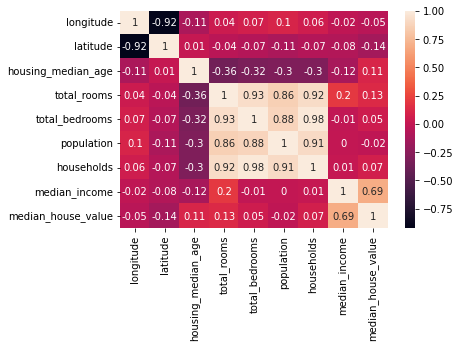

In [ ]:
import seaborn as sns
corr = df.loc[:].corr() 
sns.heatmap(corr.round(2),annot=True)
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

In [ ]:
#+ve median income, total rooms, housing median age
#-ve ocean proximity

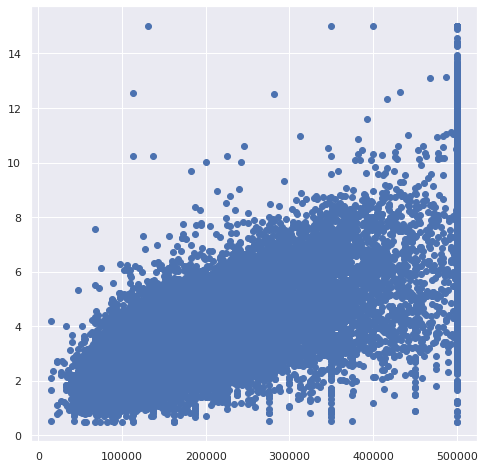

In [ ]:
plt.scatter(df['median_house_value'], df['median_income'])
plt.show()

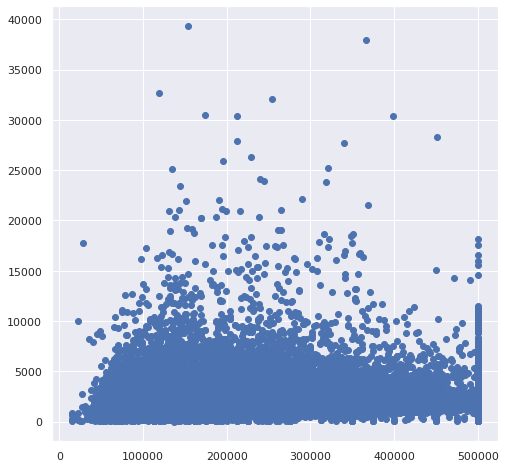

In [ ]:
plt.scatter(df['median_house_value'], df['total_rooms'])
plt.show()

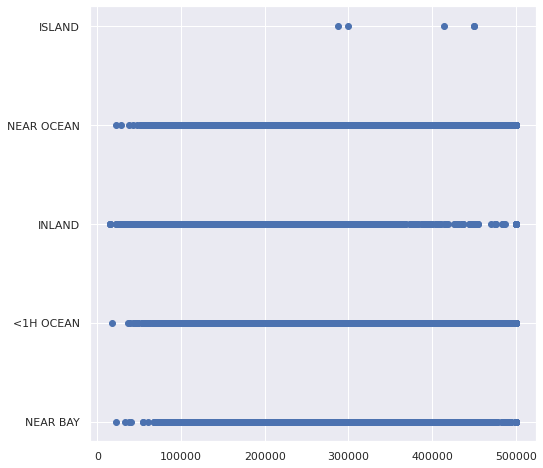

In [ ]:
plt.scatter(df['median_house_value'], df['ocean_proximity'])
plt.show()

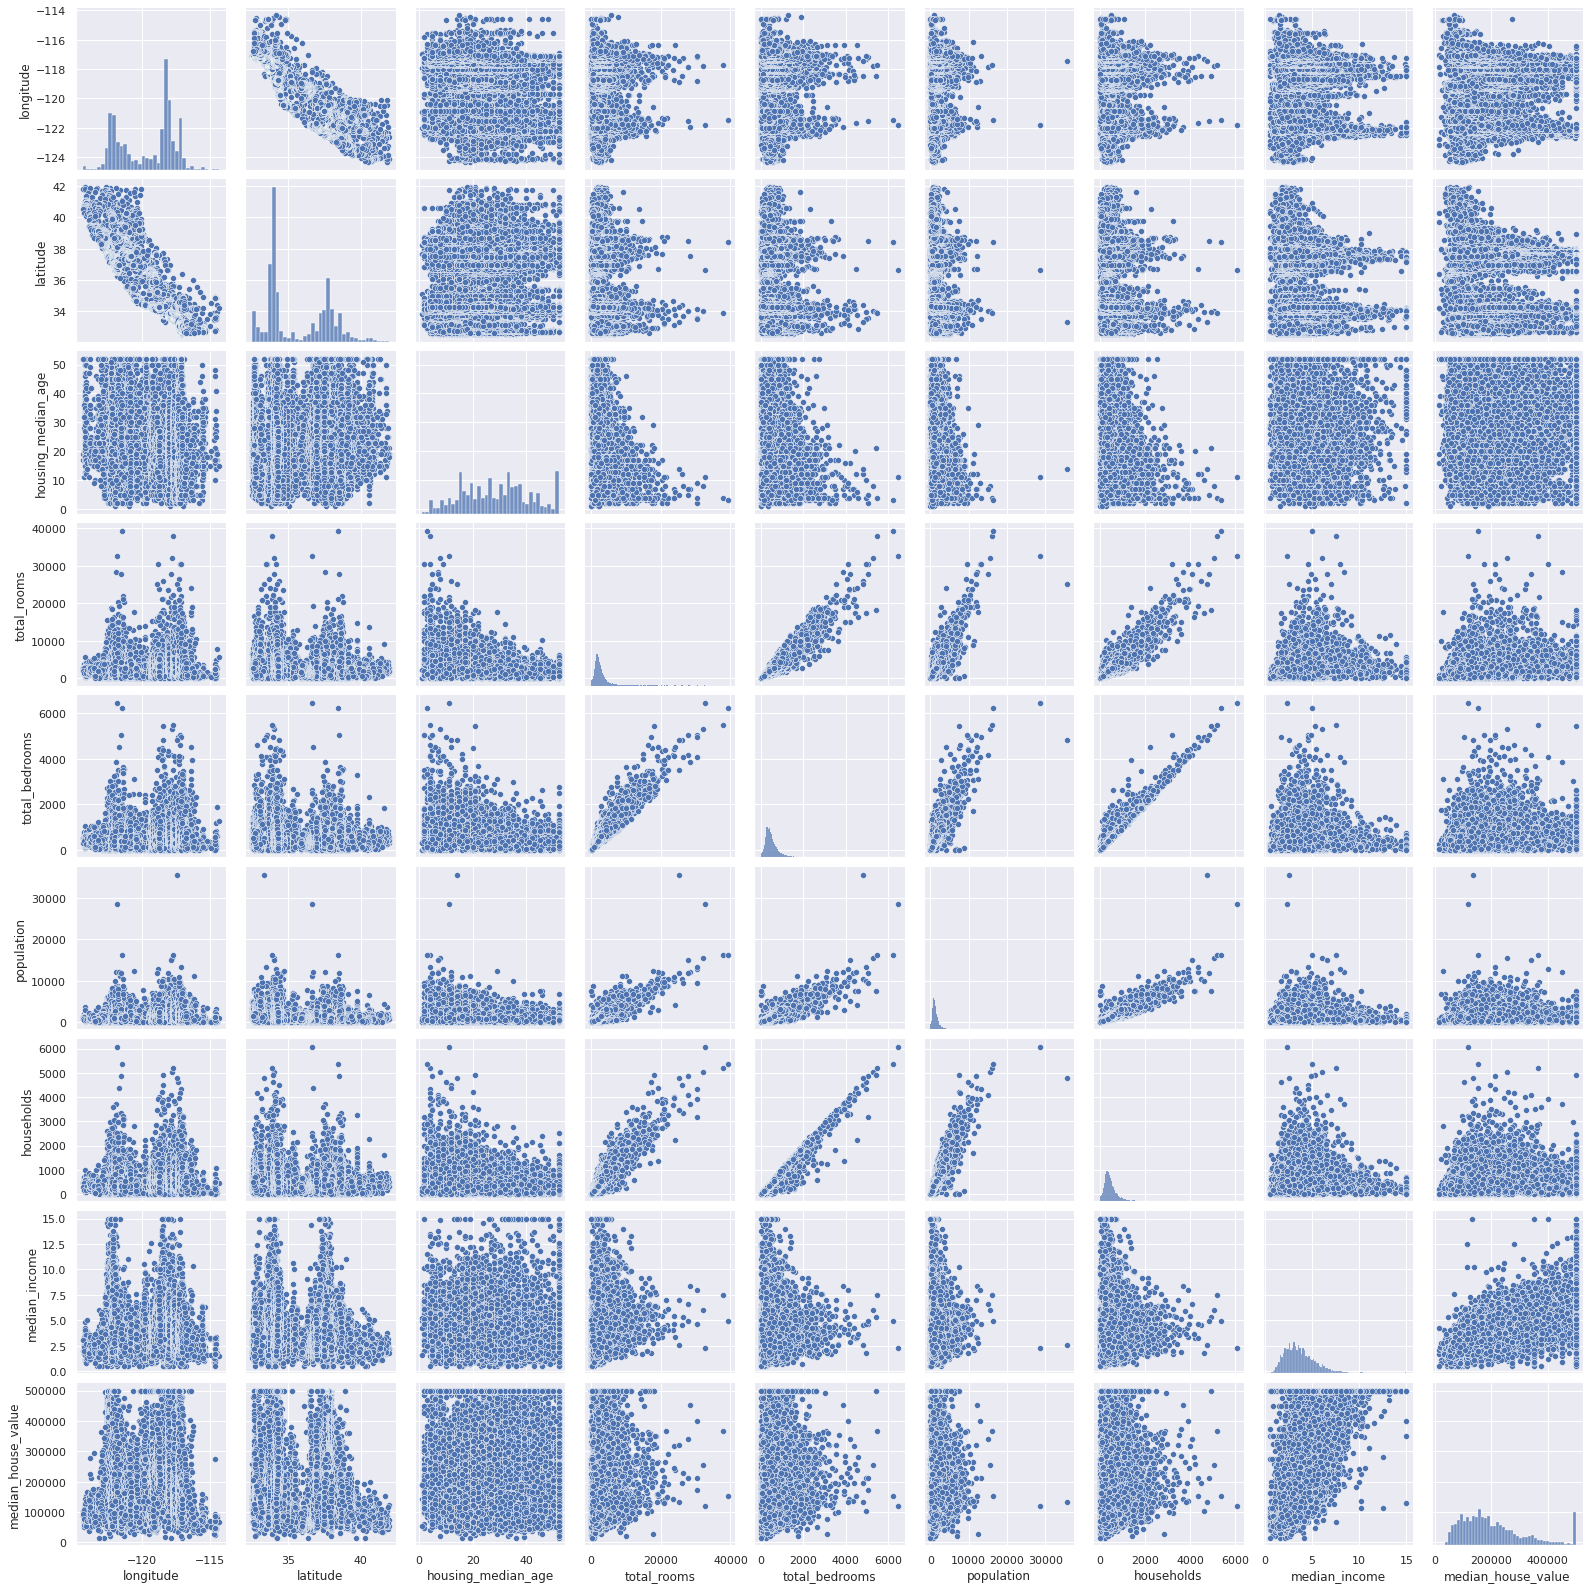

In [ ]:
sns.pairplot(df)

# Data Wrangling

we will delete total bedrooms column because it does not contribute much to median_house_value due to very less correlation 

we will also normalise the data so that no feature dominates the other

ocean proximity data type needs to be converted

In [ ]:
X1 = df.drop('median_house_value', axis=1)
X = X1.drop('total_bedrooms', axis=1)
print(X.head())

   longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income ocean_proximity  
0       126.0         8.3252        NEAR BAY  
1      1138.0         8.3014        NEAR BAY  
2       177.0         7.2574        NEAR BAY  
3       219.0         5.6431        NEAR BAY  
4       259.0         3.8462        NEAR BAY  


In [ ]:
le = LabelEncoder()
label = le.fit_transform(X['ocean_proximity'])
X['ocean_proximity'] = label
print(X.head())

   longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  ocean_proximity  
0       126.0         8.3252                3  
1      1138.0         8.3014                3  
2       177.0         7.2574                3  
3       219.0         5.6431                3  
4       259.0         3.8462                3  


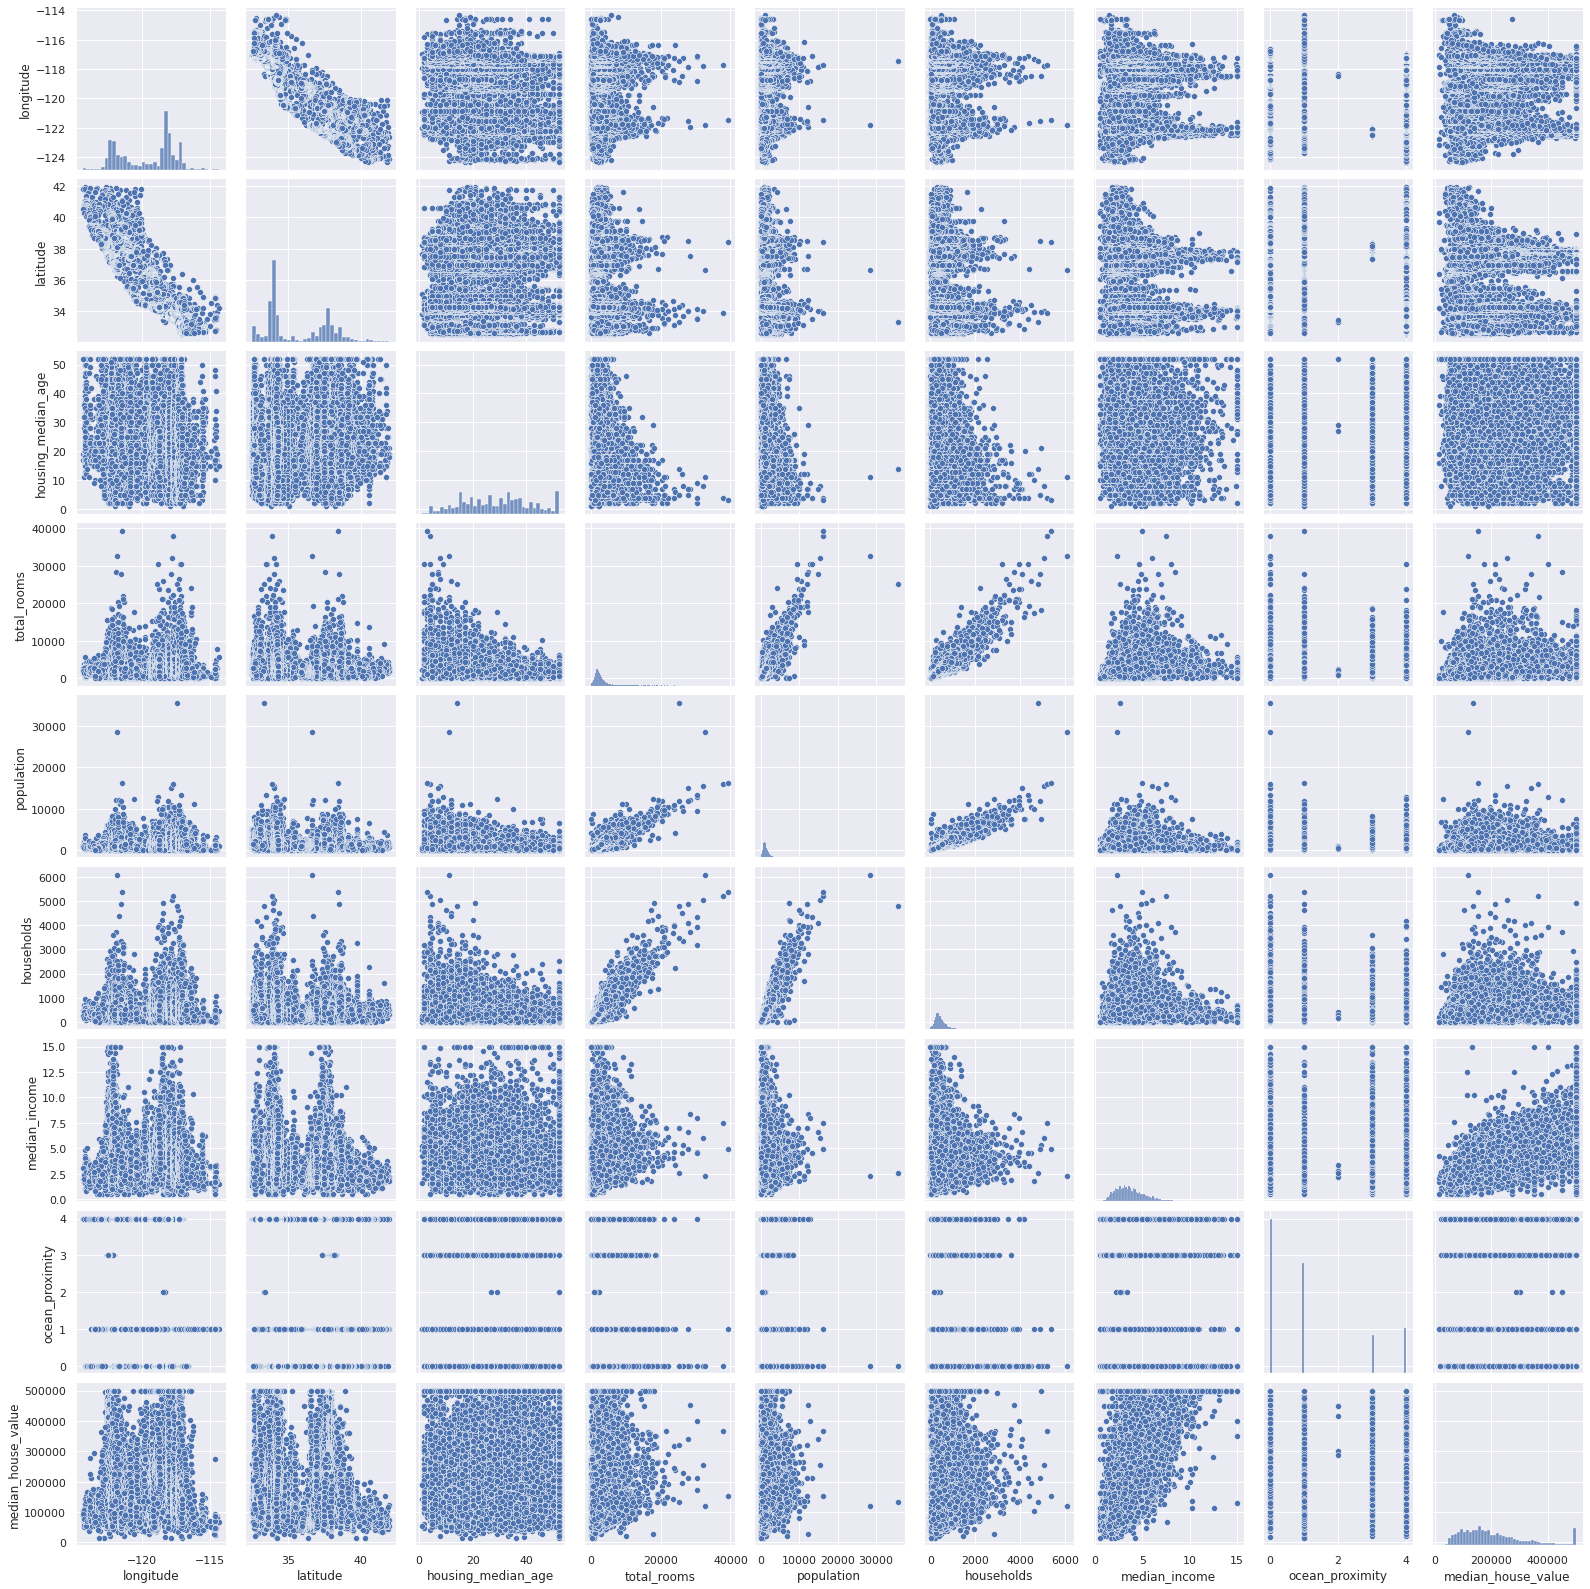

In [ ]:
df2 = X
df2['median_house_value'] = df['median_house_value']
sns.pairplot(df2)

# Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_df = pd.DataFrame(scaled_features,columns = X.columns)
scaled_df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.759847,-0.629157,-0.012881,1.291089,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.512592,-0.443449,-1.216128,-0.116739,-1.115804
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.944405,-1.008420,-0.691593,-0.116739,-1.124470
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.369537,-0.174042,-1.142593,-0.116739,-0.992746
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.604429,-0.393753,-1.054583,-0.116739,-1.058608


In [ ]:
y = df['median_house_value']
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

Training + testing + preformance analysis

In [ ]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

1.0


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)
print(neigh.score(X_test, y_test))

0.9999976627941116


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)
print(regressor.score(X_test,y_test))

1.0


## With Regularization

ridge regression:

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X,y)
print(reg.score(X_test,y_test))

1.0


lasso regression:

In [ ]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X,y)
print(lasso.score(X_test,y_test))

0.9999999999995829
